<hr />
<p style="font-family: Calibri; font-size:1.3em;color:purple;"> <em> <b>
Shreya Date (PQ56297)
<br> CMSC 678 - Homework 5
<br> Problem 1 on Support Vector Machines
<br> <hr /> </b> </em> </p>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style='ticks')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.style.use('ggplot')

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> (1a) Plot on graph paper the training instances in the input space and label them according to the class to which they belong. State whether the patterns from the two classes are linearly separable in this space. 
<br> <br> <u> Solution: </u>   
<br> <br> From the figure plotted below, we can see that the data is not linearly separable.
<br> <br> </b> </em> </p>

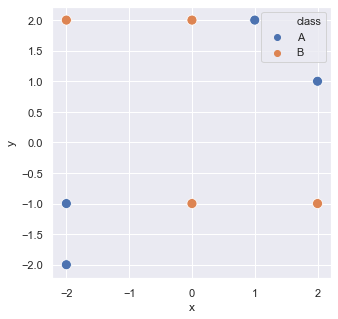

In [2]:
x = [-2, -2, 1, 2, -2, 0, 0, 2]
y = [-2, -1, 2, 1, 2, 2, -1,-1]
c = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']

df = pd.DataFrame({ "x": x, "y": y, "class": c })

sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x='x', y='y', hue='class', s = 100)


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> <br> (1b)  Create a new plot of the training instances in the feature space and label them according to the class to which they belong. 
<br> <br> <u> Solution: </u>
<br> <br> Input Space is  :  [(-2, -2), (-2, -1), (1, 2), (2, 1), (-2, 2), (0, 2), (0, -1), (2, -1)]
<br> Feature Space is:  [(4, 4), (4, 2), (1, 2), (4, 2), (4, -4), (0, 0), (0, 0), (4, -2)]
<br> <br>
</b> </em> </p>

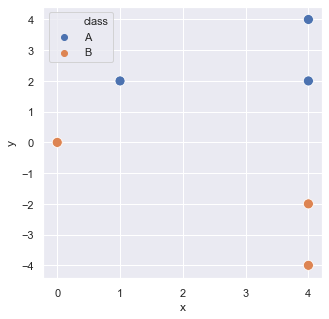

In [3]:
x1 = [-2, -2, 1, 2, -2, 0, 0, 2]
x2 = [-2, -1, 2, 1, 2, 2, -1,-1]

x = [a*a for a in x1]
y = [a*b for a,b in zip(x1, x2)]
c = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']

df = pd.DataFrame({ "x": x, "y": y, "class": c })

sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x='x', y='y', hue='class', s = 100)


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> (1c) Find the maximum margin classifier in the feature space. More specifically, find the equations of the classification boundary and of the two margin boundaries. Plot these three boundaries on the same graph that was used in step (b). Also indicate which are the support vectors in the feature space. Note that the boundaries and the support vectors are easy to find by inspection.
<br> <br> <u> Solution: </u>
<br> <br> The support vectors in the feature space seem to be (0, 0), (4, -2) and (1, 2).
<br> So, the slope of margin is -0.5.
<br> We can now get the equations of margins as y = -0.5x and y = -0.5x + 2.5.
<br> The classification boundry is equidistant from the two margin boundries.
<br> So, the equation of the classification boundry is y = -0.5x + 1.25.
<br> Feature Space is:  [(4, 4), (4, 2), (1, 2), (4, 2), (4, -4), (0, 0), (0, 0), (4, -2)] 
<br> <br> </b> </em> </p> 


Input Space is:  [(-2, -2), (-2, -1), (1, 2), (2, 1), (-2, 2), (0, 2), (0, -1), (2, -1)]

Feature Space is:  [(4, 4), (4, 2), (1, 2), (4, 2), (4, -4), (0, 0), (0, 0), (4, -2)]


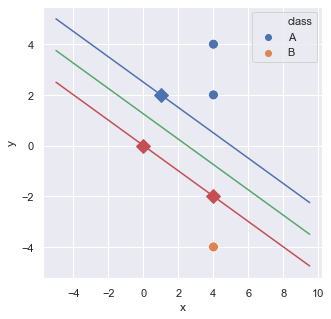

In [4]:
x1 = [-2, -2, 1, 2, -2, 0, 0, 2]
x2 = [-2, -1, 2, 1, 2, 2, -1,-1]
print("\nInput Space is: ", list(zip(x1, x2)))

x = [a*a for a in x1]
y = [a*b for a,b in zip(x1, x2)]
print("\nFeature Space is: ", list(zip(x, y)))

sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x='x', y='y', hue='class', s = 100)

x = np.arange(-5, 10, 0.5).tolist()
y = [-0.5 * a + 2.5 for a in x]
markers_on = [i for i, j in enumerate(x) if j == 1]
plt.plot(x, y, '-bD', markevery=markers_on, markersize = 10)

x = np.arange(-5, 10, 0.5).tolist()
y = [-0.5 * a + 1.25 for a in x]
plt.plot(x, y, '-g')

x = np.arange(-5, 10, 0.5).tolist()
y = [-0.5 * a for a in x]
markers_on = [i for i, j in enumerate(x) if j == 0 or j == 4]
plt.plot(x, y, '-rD', markevery=markers_on, markersize = 10)


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> (1d) Find which vectors in the input space correspond to the support vectors found in step (c)
<br> <br> <u> Solution: </u>
<br> <br> The support vector (0, 0)  corresponds to points (0, 2) and (0, -1) in input space.
<br> The support vector (4, -2) corresponds to point  (2, -1) in input space.
<br> The support vector (1, 2)  corresponds to point  (1, 2) in input space.
<br> <br> <hr /> </b> </em> </p> 

<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b>(1e) Plot the classification boundary in input space on the same graph that was used in step (a).
<br> <br> <u> Solution: </u>
<br> <br> Plotted and shaded below is the area under the curve obtained for x2*x1 = (m*x1*x1) + c
<br> We have found the equation for x2 = m*x1 + c
<br> <br>
</b> </em> </p> 

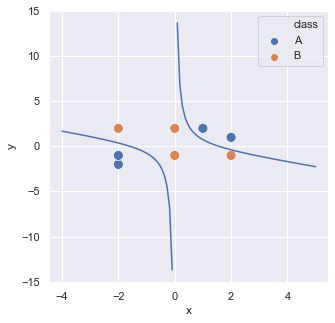

In [5]:
x = [-2, -2, 1, 2, -2, 0, 0, 2]
y = [-2, -1, 2, 1, 2, 2, -1,-1]
c = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']

df = pd.DataFrame({ "x": x, "y": y, "class": c })

sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x='x', y='y', hue='class', s = 100)


x = np.linspace(-4, 5, 100)
y = [-0.5 * a + 1.25/a for a in x]

plt.plot(x, y, 'b')


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> (1f) Plot on the same graph the boundaries of the classification margin zone in the input space. Shade the area between these two boundaries to better visualize the classification margin zone in the input space.
<br> <br> <u> Solution: </u>
<br> <br> 
<img src = "download.png">
</b> </em> </p> 

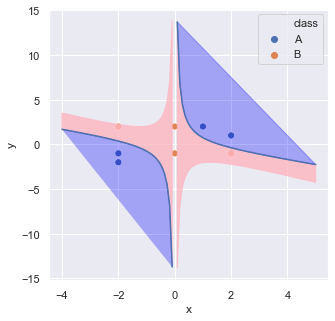

In [6]:
def f(x):
    return -0.8 * x - 1.25/x

def g(x):
    return -0.5 * x + 1.25/x

x = [-2, -2, 1, 2, -2, 0, 0, 2]
y = [-2, -1, 2, 1, 2, 2, -1,-1]
c = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']

df = pd.DataFrame({ "x": x, "y": y, "class": c })

sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data=df, x='x', y='y', hue='class', s = 50)


x = np.linspace(-4, 5, 100)
y = [-0.5 * a + 1.25/a for a in x]

plt.plot(x, y, 'b')
plt.fill(x, y, c='blue', alpha = 0.3)
plt.fill_between(x, f(x), g(x), color = 'lightpink', alpha = 0.8)
plt.legend()


<p style="font-family: Calibri; font-size:1.3em;color:green;"> <em> <b> (1g)  Write the inequality that you would use to classify new input patterns with the SVM classifier developed in steps (a) through (f). Choose an inequality that is as simple as possible.
<br> <br> <u> Solution: </u>
<br> <br> The inequality equations are:
<br> y < -0.5x + 1.25/x  for x < 0
<br> y > -0.5x + 1.25/x  for x > 0
<br> y > -0.5x + 1.25/x  for x < 0
<br> y < -0.5x + 1.25/x  for x > 0
<br><br>
</b> </em> </p> 